In [11]:
#-----------------------------------------------------------------
def write_tf(pose, q, child_frame="" , parent_frame='map'):
    #  pose = trans  q = quaternion  , childframe =""
    # format  write the transformstampled message
    t= TransformStamped()
    t.header.stamp = rospy.Time.now()
    #t.header.stamp = rospy.Time(0)
    t.header.frame_id =parent_frame
    t.child_frame_id =  child_frame
    t.transform.translation.x = pose[0]
    t.transform.translation.y = pose[1]
    t.transform.translation.z = pose[2]
    #q = tf.transformations.quaternion_from_euler(eu[0], eu[1], eu[2])
    t.transform.rotation.x = q[0]
    t.transform.rotation.y = q[1]
    t.transform.rotation.z = q[2]
    t.transform.rotation.w = q[3]
    return t
    
#-----------------------------------------------------------------
def read_tf(t):
    # trasnform message to np arrays
    pose=np.asarray((
        t.transform.translation.x,
        t.transform.translation.y,
        t.transform.translation.z
        ))
    quat=np.asarray((
        t.transform.rotation.x,
        t.transform.rotation.y,
        t.transform.rotation.z,
        t.transform.rotation.w
        ))
    
    return pose, quat
#-----------------------------------------------------------------    

[ WARN] [1743741371.440632511]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 1224.032000 according to authority /pose_integrator
[ WARN] [1743741371.440705079]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 1224.032000 according to authority /pose_integrator
[ WARN] [1743741371.440749929]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 1224.032000 according to authority /pose_integrator
[ WARN] [1743741371.440793522]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 1224.032000 according to authority /pose_integrator
[ WARN] [1743741371.440845090]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 1224.032000 according to authority /pose_integrator
[ WARN] [1743741371.440891656]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at t

In [30]:
def points_to_PCA(points):
    df=pd.DataFrame(points)
    df.columns=[['x','y','z']]
    threshold= df_pts['z'].min().values[0]*0.998
    print (threshold)
    rslt_df = df.loc[df[df['z'] > threshold].index]
    points=rslt_df[['x','y','z']].dropna().values
    Pca=PCA(n_components=3)
    Pca.fit(points)
    print('Pca.explained_variance_',Pca.explained_variance_)
    ## HOMOGENEUS
    E_R= np.zeros((4,4))
    E_R[:3,:3]+=R
    E_R[-1,-1]=1
    return     E_R


In [31]:
def points_to_PCA(points):
    df=pd.DataFrame(points)
    df.columns=[['x','y','z']]
    threshold= df_pts['z'].min().values[0]*0.998
    print (threshold)
    rslt_df = df.loc[df[df['z'] > threshold].index]

    
    points=rslt_df[['x','y','z']].dropna().values
    Pca=PCA(n_components=3)
    Pca.fit(points)
    #print('Pca.explained_variance_',Pca.explained_variance_)
    ref=np.eye(3)
    pcas=Pca.components_
    R=[]
    R.append(np.dot(pcas[0],ref))
    R.append(np.dot(pcas[1],ref))
    R.append(np.dot(pcas[2],ref))
    R=np.asarray(R)
    ## HOMOGENEUS
    E_R= np.zeros((4,4))
    E_R[:3,:3]+=R
    E_R[-1,-1]=1
    return     E_R


In [6]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA
import tf

In [ ]:
points=np.load('/home/roboworks/Documents/points.npy')
df_pts=pd.DataFrame(points)
df_pts.columns=[['x','y','z']]
threshold= df_pts['z'].min().values[0]*0.998
print (threshold)
rslt_df_pts = df_pts[['x','y','z']][df_pts[['x','y','z']] > threshold]
print (rslt_df_pts.describe())
newpoints=rslt_df_pts[['x','y','z']].values
E_R=points_to_PCA(newpoints)
print(np.rad2deg(tf.transformations.euler_from_matrix(E_R)))
print(np.sign(np.rad2deg(tf.transformations.euler_from_matrix(E_R))[0])*np.rad2deg(tf.transformations.euler_from_matrix(E_R))[1])

In [ ]:
points=np.load('/home/roboworks/Documents/points2.npy')

points
points_to_PCA(points)
points.shape

In [ ]:
rslt_df_pts = df_pts.loc[df_pts[df_pts['z'] > threshold].index]

points=rslt_df_pts[['x','y','z']].dropna().values   
points

In [ ]:
points_to_PCA(points)

In [ ]:
df_pts

In [ ]:
rslt_df_pts

-98.63997914 -40.27221135 107.26441686<br>
[ 97.6089583  -39.13610332 119.11722414]<br><br><br><br><br><br><br><br><br>

In [ ]:
tf.transformations.euler_from_quaternion((0.62734299, 0.40730226, 0.66127357, 0.05712182))

In [ ]:
e_ER=tf.transformations.euler_from_matrix(E_R)
q_ET=tf.transformations.quaternion_from_euler(e_ER[0],e_ER[1],e_ER[2])
print (q_ET)

In [ ]:
quat=tf.transformations.quaternion_from_matrix(E_R)
print(tf.transformations.euler_from_matrix(E_R))
print(quat)

In [ ]:
points.shape

In [ ]:

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(points[:,0],points[:,1],points[:,2])

In [ ]:
points=np.load('/home/roboworks/Documents/points2.npy')

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(points[:,0],points[:,1],points[:,2])

In [ ]:
import seaborn as sns
import pandas as pd
df=pd.DataFrame(points)
df.columns=[['x','y','z']]
df.describe()

In [ ]:
threshold= df['z'].min().values[0]*0.998
threshold

In [ ]:
threshold= df['z'].min().values[0]*0.998
 # ( remove some ground)
#threshsold=-0.978
rslt_df = df[['x','y','z']][df[['x','y','z']] > threshold]

In [ ]:
rslt_df.describe()

In [ ]:
#points=rslt_df[['x','y','z']].sample(30).values
points=rslt_df[['x','y','z']].values
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(points[:,0],points[:,1],points[:,2])
pt=rslt_df[['x','y','z']].mean().values
ax.scatter(pt[0],pt[1],pt[2],'o')

In [ ]:
E_R=points_to_PCA(points)
E_R

[-92.55031776  -0.92126908 118.62054193]<br>
[-98.61322822 -44.31230308 106.44802105]<br>
[106.458072   -64.33138726 112.32396092]<br>



In [ ]:

print(np.rad2deg(tf.transformations.euler_from_matrix(E_R)))

In [ ]:
print(np.rad2deg(tf.transformations.euler_from_matrix(E_R)))

In [ ]:
quat=tf.transformations.quaternion_from_matrix(E_R)
print(tf.transformations.euler_from_matrix(E_R))

In [ ]:
points=rslt_df[['x','y','z']].dropna().values
pt=rslt_df[['x','y','z']].mean().values


In [ ]:
from sklearn.decomposition import PCA
Pca=PCA(n_components=3)
Pca.fit(points)
        

print(Pca.singular_values_)
print(Pca.explained_variance_)
norm_expl=Pca.explained_variance_/Pca.explained_variance_.sum()
norm_expl

In [ ]:
Pca.components_

In [ ]:
#points=rslt_df[['x','y','z']].sample(300).values
points=rslt_df[['x','y','z']].values
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(points[:,0],points[:,1],points[:,2])
pt=rslt_df[['x','y','z']].mean().values
ax.scatter(pt[0],pt[1],pt[2],'o')


In [ ]:
Pca.components_


In [ ]:
np.cross(Pca.components_[0],Pca.components_[1])

In [ ]:
pt=rslt_df[['x','y','z']].mean().values
pts_1=[]
pts_2=[]
pts_3=[]
p_1=[]
p_2=[]
p_3=[]

pts_1.append(pt)
pts_2.append(pt)
pts_3.append(pt)
for i in range (-5,5):
    
    pts_1.append(pt +Pca.components_[0]*i/30 )
    p_1.append(pt + (np.eye(3)[0]*i/30) )
    pts_2.append(pt +Pca.components_[1]*i/30 )
    p_2.append(pt + (np.eye(3)[1]*i/30) )
    pts_3.append(pt +Pca.components_[2]*i/30 )
    p_3.append(pt + (np.eye(3)[2]*i/30) )

pts_1=np.asarray(pts_1)  
pts_2=np.asarray(pts_2)    
pts_3=np.asarray(pts_3)    
ps_x=np.asarray(p_1)  
ps_y=np.asarray(p_2)  
ps_z=np.asarray(p_3)  

In [ ]:
fig = plt.figure()
#points=np.load('/home/roboworks/Documents/points.npy')

ax = fig.add_subplot(111, projection = '3d')
ax.scatter(points[:,0],points[:,1],points[:,2],alpha=0.051,c='c')
ax.scatter(pts_1[:,0],pts_1[:,1],pts_1[:,2],c='r')
ax.scatter(pts_2[:,0],pts_2[:,1],pts_2[:,2],c='g')
ax.scatter(pts_3[:,0],pts_3[:,1],pts_3[:,2],c='b')
#ax.scatter(ps_x[:,0],ps_x[:,1],ps_x[:,2],alpha=0.25,c='r')
#ax.scatter(ps_y[:,0],ps_y[:,1],ps_y[:,2],alpha=0.25,c='g')
#ax.scatter(ps_z[:,0],ps_z[:,1],ps_z[:,2],alpha=0.25,c='b')

#ax.scatter(pt[1],pt[0],pt[2],'o', c='y')
plt.show()

In [ ]:
pts_3

In [ ]:
ref=np.eye(3)
pcas=Pca.components_
R=[]
R.append(np.dot(pcas[0],ref))
R.append(np.dot(pcas[1],ref))
R.append(np.dot(pcas[2],ref))

R=np.asarray(R)
## HOMOGENEUS
E_R= np.zeros((4,4))
E_R[:3,:3]+=R
E_R[-1,-1]=1
E_R

In [ ]:
x_rot=np.asarray(np.matmul(pts_1,R))
y_rot=np.asarray(np.matmul(pts_2,R))
z_rot=np.asarray(np.matmul(pts_3,R))
fig = plt.figure()
points=np.load('/home/roboworks/Documents/points.npy')

ax = fig.add_subplot(111, projection = '3d')
ax.scatter(points[:,0],points[:,1],points[:,2],alpha=0.1,c='c')
ax.scatter(pts_1[:,0],pts_1[:,1],pts_1[:,2],c='r')
ax.scatter(pts_2[:,0],pts_2[:,1],pts_2[:,2],c='g')
ax.scatter(pts_3[:,0],pts_3[:,1],pts_3[:,2],c='b')
ax.scatter(ps_x[:,0],ps_x[:,1],ps_x[:,2],alpha=0.15,c='r')
ax.scatter(ps_y[:,0],ps_y[:,1],ps_y[:,2],alpha=0.15,c='g')
ax.scatter(ps_z[:,0],ps_z[:,1],ps_z[:,2],alpha=0.15,c='b')
ax.scatter(x_rot[:,0],x_rot[:,1],x_rot[:,2],alpha=0.5,c='r')
ax.scatter(y_rot[:,0],y_rot[:,1],y_rot[:,2],alpha=0.5,c='g')
ax.scatter(z_rot[:,0],z_rot[:,1],z_rot[:,2],alpha=0.5,c='b')
#ax.scatter(pt[1],pt[0],pt[2],'o', c='y')

plt.show()

In [ ]:
##  Z=0  ( Proyeccion)
fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(pts_1[:,0],pts_1[:,1],alpha=1,c='r')
ax.scatter(ps_x[:,0],ps_x[:,1],alpha=0.25,c='r')
plt.xlim(0.7,1)
plt.ylim(-0.75,0.25)
plt.show()

In [ ]:
np.arctan2((pts_1[1,1]-pts_1[0,1]),(pts_1[1,0]-pts_1[0,0]))

In [ ]:
ang= -np.arctan2((pts_1[1,1]-pts_1[0,1]),(pts_1[1,0]-pts_1[0,0]))
mat=np.mat((np.asarray((np.cos(ang) ,np.sin(ang),0,-1*np.sin(ang),np.cos(ang),0,0,0,1)).reshape((3,3))))

In [ ]:
x_rot=np.asarray(np.matmul(pts_1,R))
y_rot=np.asarray(np.matmul(pts_2,R))
z_rot=np.asarray(np.matmul(pts_3,R))


In [ ]:

fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(pts_1[:,0],pts_1[:,1],alpha=1,c='r')
ax.scatter(xy_rot[:,0],xy_rot[:,1],alpha=0.25,c='y')
ax.scatter(ps_x[:,0],ps_x[:,1],alpha=0.25,c='r')

plt.show()

In [ ]:
fig = plt.figure()
points=np.load('/home/roboworks/Documents/points.npy')

ax = fig.add_subplot(111, projection = '3d')
ax.scatter(points[:,0],points[:,1],points[:,2],alpha=0.1,c='c')
ax.scatter(pts_1[:,0],pts_1[:,1],pts_1[:,2],c='r')
ax.scatter(pts_2[:,0],pts_2[:,1],pts_2[:,2],c='g')
ax.scatter(pts_3[:,0],pts_3[:,1],pts_3[:,2],c='b')
ax.scatter(ps_x[:,0],ps_x[:,1],ps_x[:,2],alpha=0.15,c='r')
ax.scatter(ps_y[:,0],ps_y[:,1],ps_y[:,2],alpha=0.15,c='g')
ax.scatter(ps_z[:,0],ps_z[:,1],ps_z[:,2],alpha=0.15,c='b')
ax.scatter(x_rot[:,0],x_rot[:,1],x_rot[:,2],alpha=0.25,c='r')
ax.scatter(y_rot[:,0],y_rot[:,1],y_rot[:,2],alpha=0.25,c='g')
ax.scatter(z_rot[:,0],z_rot[:,1],z_rot[:,2],alpha=0.25,c='b')
#ax.scatter(pt[1],pt[0],pt[2],'o', c='y')

plt.show()

In [ ]:
##y=0
##  Z=0  ( Proyeccion)
fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(x_rot[:,0],x_rot[:,2],alpha=0.25,c='r')
ax.scatter(ps_x[:,0],ps_x[:,2],alpha=0.25,c='r')



plt.show()

In [ ]:
ps_y

In [ ]:
pt=rslt_df[['x','y','z']].mean().values
pts_1=[]
pts_2=[]
pts_3=[]

pts_1.append(pt)
pts_2.append(pt)
pts_3.append(pt)

for i in range (-5,5):
    
    pts_1.append(pt +Pca.components_[0]*i/30 )
    pts_2.append(pt +Pca.components_[1]*i/30 )
    pts_3.append(pt +Pca.components_[2]*i/30 )
    
pts_1=np.asarray(pts_1)    
pts_2=np.asarray(pts_2)    
pts_3=np.asarray(pts_3)    
fig = plt.figure()
points=np.load('/home/roboworks/Documents/points.npy')

ax = fig.add_subplot(111, projection = '3d')
ax.scatter(points[:,1],points[:,0],points[:,2],alpha=0.1,c='c')
ax.scatter(pts_1[:,1],pts_1[:,0],pts_1[:,2],alpha=1,c='r')
ax.scatter(pts_2[:,1],pts_2[:,0],pts_2[:,2],c='g')
ax.scatter(pts_3[:,1],pts_3[:,0],pts_3[:,2],c='b')
#ax.scatter(pt[1],pt[0],pt[2],'o', c='y')
fig.canvas.draw()
img = np.fromstring(fig.canvas.tostring_rgb(), dtype=np.uint8,
            sep='')
img  = img.reshape(fig.canvas.get_width_height()[::-1] + (3,))


In [ ]:
plt.imshow (img)

In [ ]:
fig.canvas.draw()
img = np.fromstring(fig.canvas.tostring_rgb(), dtype=np.uint8,
            sep='')
img  = img.reshape(fig.canvas.get_width_height()[::-1] + (3,))

In [ ]:
plt.imshow (img)


In [ ]:
#! pip install plotly


In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(pts_1[:,0],pts_1[:,1],alpha=1,c='r')
ax.scatter(pts_2[:,0],pts_2[:,1],alpha=1,c='g')
plt.xlim(-0.5, 1.5)

plt.show()

In [ ]:
np.arctan2((pts_1[1,1]-pts_1[0,1]),(pts_1[1,0]-pts_1[0,0]))

In [ ]:
b=-m*0.91222286-0.08526602

In [ ]:
pts_1[:,:2],pts_1[1,1],pts_1[0,1]

In [ ]:
x_y_1=pts_1[2:-1,:2]
x_y_2=pts_2[2:-1,:2]

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(x_y_1[:,0],x_y_1[:,1],alpha=1,c='r')
ax.scatter(x_y_2[:,0],x_y_2[:,1],alpha=1,c='g')
ax.scatter(xy_rot[:,0], xy_rot[:,1],alpha=1,c='b')
plt.show()

In [ ]:
ang= 0.7
mat=np.mat((np.asarray((np.cos(ang) ,np.sin(ang),0,-1*np.sin(ang),np.cos(ang),0,0,0,1)).reshape((3,3))))

In [ ]:
xy_rot=np.asarray(np.matmul(pts_1,mat))
xy2_rot=np.asarray(np.matmul(pts_2,mat))

In [ ]:

fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(x_y_1[:,0],x_y_1[:,1],alpha=1,c='r')
ax.scatter(x_y_2[:,0],x_y_2[:,1],alpha=1,c='g')
ax.scatter(xy_rot[:,0], xy_rot[:,1],alpha=1,c='r')
ax.scatter(xy2_rot[:,0], xy2_rot[:,1],alpha=1,c='g')

plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

In [ ]:
x_y_1

In [ ]:
xy_rot.reshape((8,2))

In [ ]:
pcas=Pca.components_

In [ ]:
ref=np.eye(3)

In [ ]:
R=[]
R.append(np.dot(pcas[0],ref))
R.append(np.dot(pcas[1],ref))
R.append(np.dot(pcas[2],ref))

R=np.asarray(R)
## HOMOGENEUS
E_R= np.zeros((4,4))
E_R[:3,:3]+=R
E_R[-1,-1]=1
tf.transformations.quaternion_from_matrix(E_R)

In [ ]:
points.shape

In [ ]:
cv2.__version__

In [ ]:
R

In [ ]:
## HOMOGENEUS
E_R= np.zeros((4,4))
E_R[:3,:3]+=R
E_R[-1,-1]=1

In [ ]:
points= rgbd.get_points()

In [ ]:
from smach_utils2 import *
import matplotlib.pyplot as plt
plt.imshow(img_map[700:1200,700:1400])

In [ ]:
plt.imshow(img_map[700:1200,700:1400])

In [ ]:
mask=cv2.imread('/home/roboworks/Documents/imgcorr.png')
plt.imshow (mask[:,:,2]*255)

In [ ]:
img_correc

In [ ]:
img=im[:,:,0]

In [ ]:
np.where(img==0, )
img_corrected = np.where((img==0) ,img,1.0)  #FLOOR

In [ ]:
plt.imshow (img_corrected*255)

In [ ]:
im.shape

In [ ]:
pts=rgbd.get_points()

In [ ]:
def write_tf(pose, q, child_frame="" , parent_frame='map'):
    #  pose = trans  q = quaternion  , childframe =""
    # format  write the transformstampled message
    t= TransformStamped()
    t.header.stamp = rospy.Time.now()
    #t.header.stamp = rospy.Time(0)
    t.header.frame_id =parent_frame
    t.child_frame_id =  child_frame
    t.transform.translation.x = pose[0]
    t.transform.translation.y = pose[1]
    t.transform.translation.z = pose[2]
    #q = tf.transformations.quaternion_from_euler(eu[0], eu[1], eu[2])
    t.transform.rotation.x = q[0]
    t.transform.rotation.y = q[1]
    t.transform.rotation.z = q[2]
    t.transform.rotation.w = q[3]
    return t
#-----------------------------------------------------------------
def read_tf(t):
    # trasnform message to np arrays
    pose=np.asarray((
        t.transform.translation.x,
        t.transform.translation.y,
        t.transform.translation.z
        ))
    quat=np.asarray((
        t.transform.rotation.x,
        t.transform.rotation.y,
        t.transform.rotation.z,
        t.transform.rotation.w
        ))
    
    return pose, quat

def correct_points(points_msg):

    # Function that transforms Point Cloud reference frame from  head, to map. (i.e. sensor coords to map coords )
    # img= correct_points() (Returns rgbd depth corrected image)    
    #points msg in 
    #data = rospy.wait_for_message('/hsrb/head_rgbd_sensor/depth_registered/rectified_points', PointCloud2)
    

    np_data=ros_numpy.numpify(points_msg)

    try:
        trans = tfBuffer.lookup_transform('map', 'head_rgbd_sensor_link', rospy.Time())
                    
        trans,rot=read_tf(trans)
        print ("############head",trans,rot)
    except (tf2_ros.LookupException, tf2_ros.ConnectivityException, tf2_ros.ExtrapolationException):
        print ( 'No  head TF FOUND')

    #trans,rot=tf_listener.lookupTransform('/map', '/head_rgbd_sensor_rgb_frame', rospy.Time(0))
    #print ("############TF1",trans,rot)
    eu=np.asarray(tf.transformations.euler_from_quaternion(rot))
    t=TransformStamped()
    rot=tf.transformations.quaternion_from_euler(eu[0],eu[1],eu[2])
    #rot=tf.transformations.quaternion_from_euler(-eu[1],0,0)
    t.header.stamp = points_msg.header.stamp
    t.transform.rotation.x = rot[0]
    t.transform.rotation.y = rot[1]
    t.transform.rotation.z = rot[2]
    t.transform.rotation.w = rot[3]
    cloud_out = do_transform_cloud(points_msg, t)
    np_corrected=ros_numpy.numpify(cloud_out)
    corrected=np_corrected.reshape(np_data.shape)
    img= np.copy(-corrected['z'])
    img[np.isnan(img)]=2
    img_corrected = np.where((img<trans[2]*0.96) ,img,5)

    return img_corrected , corrected

In [ ]:
points_msg=rospy.wait_for_message("/hsrb/head_rgbd_sensor/depth_registered/rectified_points",PointCloud2,timeout=5)

In [ ]:
points_data = ros_numpy.numpify(points_msg)
img_corrected ,corrected = correct_points(points_msg)
for i in range(corrected['x'].shape[0]):
    for j in range(corrected['x'].shape[1]):
        pass
        #print(corrected[['x','y','z']][i,j])

In [ ]:
origin_map_img=[round(img_map.shape[0]*0.5) ,round(img_map.shape[1]*0.5)]
corrected[0,0]

In [ ]:

points_data[['x','y','z']].shape

In [ ]:
points_data[['x','y','z']][250,300] , corrected[['x','y','z']][250,300]

In [ ]:
plt.imshow(corrected['x'])

In [ ]:
corrected[['x','y','z']][240,320]

In [ ]:
robot_pose=get_robot_px()
px_pose_robot=np.asarray((origin_map_img[1]+robot_pose[1],origin_map_img[0]+robot_pose[0]))
iimg=draw_at(px_pose_robot[0], px_pose_robot[1] , img_map )   #ROBOT PX POSE

In [ ]:
plt.imshow (iimg[750:1300,800:1500])

In [ ]:
corrected[0,0]

In [ ]:
def draw_at (px,py, contoured):
    contoured[px-5:px+5,py-5:py+5]=200
    return contoured
    

In [ ]:
origin_map_img=[round(img_map.shape[0]*0.5) ,round(img_map.shape[1]*0.5)]
robot_pose=get_robot_px()

points_msg=rospy.wait_for_message("/hsrb/head_rgbd_sensor/depth_registered/rectified_points",PointCloud2,timeout=5)
points_data = ros_numpy.numpify(points_msg)
img_corrected ,corrected = correct_points(points_msg)
for i in range (400):
    if np.isnan(corrected[i,-1][0]) or np.isnan(corrected[-1,i][0])or np.isnan(corrected[i,0][0]) or np.isnan(corrected[0,i][0]) :print('nan ')
        
    else:
        px_from_pose= origin_map_img[1]+ round(corrected[i,0][1]/pix_per_m)+robot_pose[1],origin_map_img[0]+ round(corrected[i,0][0]/pix_per_m)+robot_pose[0]
        iimg=draw_at(px_from_pose[0], px_from_pose[1] , img_map )
        px_from_pose= origin_map_img[1]+ round(corrected[i,-1][1]/pix_per_m)+robot_pose[1],origin_map_img[0]+ round(corrected[i,-1][0]/pix_per_m)+robot_pose[0]
        iimg=draw_at(px_from_pose[0], px_from_pose[1] , img_map )
        px_from_pose= origin_map_img[1]+ round(corrected[0,i][1]/pix_per_m)+robot_pose[1],origin_map_img[0]+ round(corrected[0,i][0]/pix_per_m)+robot_pose[0]
        iimg=draw_at(px_from_pose[0], px_from_pose[1] , img_map )
        px_from_pose= origin_map_img[1]+ round(corrected[-1,i][1]/pix_per_m)+robot_pose[1],origin_map_img[0]+ round(corrected[-1,i][0]/pix_per_m)+robot_pose[0]
        iimg=draw_at(px_from_pose[0], px_from_pose[1] , img_map )



plt.imshow(iimg[750:1300,800:1500])


In [ ]:
iimg=draw_at(origin_map_img[1], origin_map_img[0] , img_map )
plt.imshow(iimg[750:1300,800:1500])


In [ ]:


px_from_map=np.asarray((origin_map_img[1]+corrected[-1,-1][0],origin_map_img[0]+corrected[-1,-1][1]))
iimg=draw_at(px_from_pose[0], px_from_pose[1] , img_map )
plt.imshow(iimg[750:1300,800:1500])


In [ ]:
iimg=draw_at(px_from_pose[0], px_from_pose[1] , img_map )

In [ ]:
plt.imshow(iimg[750:1300,800:1500])

In [ ]:
img_map[origin_map_img[1]+ round(corrected[0,0][1]/pix_per_m),origin_map_img[0]+ round(corrected[0,0][0]/pix_per_m)]

In [ ]:
plt.imshow(corrected['x'])

In [ ]:
corrected[100,500]

In [ ]:
from smach_utils2 import *

points_msg=rospy.wait_for_message("/hsrb/head_rgbd_sensor/depth_registered/rectified_points",PointCloud2,timeout=5)

In [1]:
from smach_utils2 import *


/home/roboworks/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
[ WARN] [1743740984.834947761]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 1164.787000 according to authority /pose_integrator


In [2]:
points_msg=rospy.wait_for_message("/hsrb/head_rgbd_sensor/depth_registered/rectified_points",PointCloud2,timeout=5)

[ WARN] [1743741008.461976581]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 1168.523000 according to authority /pose_integrator
[ WARN] [1743741008.462047860]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 1168.523000 according to authority /pose_integrator
[ WARN] [1743741008.462097237]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 1168.523000 according to authority /pose_integrator
[ WARN] [1743741008.462137565]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 1168.523000 according to authority /pose_integrator
[ WARN] [1743741008.462188299]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 1168.523000 according to authority /pose_integrator
[ WARN] [1743741008.462244680]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at t

In [5]:
points_data = ros_numpy.numpify(points_msg)
image = points_data['rgb'].view((np.uint8, 4))[..., [2, 1, 0]]
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)    

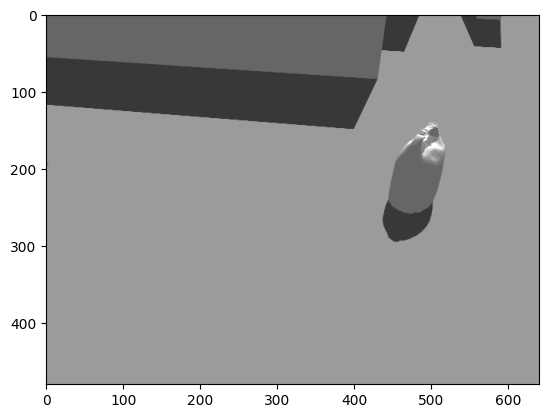

[ WARN] [1743741319.505359939]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 1216.032000 according to authority /pose_integrator
[ WARN] [1743741319.505500765]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 1216.032000 according to authority /pose_integrator
[ WARN] [1743741319.505576802]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 1216.032000 according to authority /pose_integrator
[ WARN] [1743741319.505645918]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 1216.032000 according to authority /pose_integrator
[ WARN] [1743741319.505714131]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 1216.032000 according to authority /pose_integrator
[ WARN] [1743741319.505781793]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at t

In [7]:
plt.imshow(rgb_image)

In [10]:
try:
        trans = tfBuffer.lookup_transform('map', 'head_rgbd_sensor_link', rospy.Time())

        trans,rot=read_tf(trans)
        #print ("############head",trans,rot)
except (tf2_ros.LookupException, tf2_ros.ConnectivityException, tf2_ros.ExtrapolationException):
        print ( 'No head TF FOUND')
t= write_tf(trans,rot)
cloud_out = do_transform_cloud(points_msg, t)

In [13]:
np_corrected=ros_numpy.numpify(cloud_out)
corrected=np_corrected.reshape(points_data.shape)

In [23]:
orig_image= rgb_image.copy()
mask= np.zeros(corrected['z'].shape)#mask    

In [24]:
y_min=138
y_max=261
x_min=445
x_max=522
mask=cv2.rectangle(mask,(x_min,y_min),(x_max, y_max), (255,255,255), -1)

In [33]:
#-----------------------------------------------------------------
def points_to_PCA(points):
    df=pd.DataFrame(points)
    df.columns=[['x','y','z']]
    threshold= df['z'].min().values[0]*0.998
    print (threshold)
    rslt_df = df.loc[df[df['z'] > threshold].index]
    points=rslt_df[['x','y','z']].dropna().values
    Pca=PCA(n_components=3)
    Pca.fit(points)
    print('Pca.explained_variance_',Pca.explained_variance_)
    ref=np.eye(3)
    pcas=Pca.components_
    R=[]
    R.append(np.dot(pcas[0],ref))
    R.append(np.dot(pcas[1],ref))
    R.append(np.dot(pcas[2],ref))
    R=np.asarray(R)
    ## HOMOGENEUS
    E_R= np.zeros((4,4))
    E_R[:3,:3]+=R
    E_R[-1,-1]=1
    return     E_R


In [34]:
_, binary_image = cv2.threshold(mask, 20, 255, cv2.THRESH_BINARY)
individual_mask=(mask*binary_image).astype(np.uint8)        
cent=np.asarray(   ((  np.nanmean(corrected['x'][np.where(individual_mask==1)]) ,np.nanmean(corrected['y'][np.where(individual_mask==1)]),np.nanmean(corrected['z'][np.where(individual_mask==1)])       ))      )
points_c=np.asarray((corrected['x'][np.where(individual_mask==1)],corrected['y'][np.where(individual_mask==1)],corrected['z'][np.where(individual_mask==1)]))
print ( points_c.shape)
E_R=points_to_PCA(points_c.transpose())
e_ER=tf.transformations.euler_from_matrix(E_R)
quat_pca= tf. transformations.quaternion_from_euler(e_ER[0],e_ER[1],e_ER[2])
print("ANGLE:",tf.transformations.euler_from_matrix(E_R)," Degrees:",np.rad2deg(tf.transformations.euler_from_matrix(E_R)))

(3, 9672)
-0.00033625644067069514
Pca.explained_variance_ [0.044803   0.00612735 0.00353513]
ANGLE: (-1.3018462751139728, 0.02060195197056404, 0.3235436962456698)  Degrees: [-74.59029714   1.1804049   18.53768828]


[ WARN] [1743742208.808183642]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 1355.992000 according to authority /pose_integrator
[ WARN] [1743742208.808248053]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 1355.992000 according to authority /pose_integrator
[ WARN] [1743742208.808288997]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 1355.992000 according to authority /pose_integrator
[ WARN] [1743742208.808384446]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 1355.992000 according to authority /pose_integrator
[ WARN] [1743742208.808450375]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 1355.992000 according to authority /pose_integrator
[ WARN] [1743742208.808507087]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at t

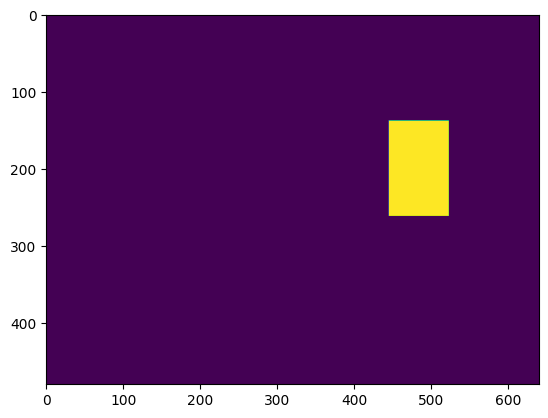

[ WARN] [1743741857.624823491]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 1300.347000 according to authority /pose_integrator
[ WARN] [1743741857.624903551]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 1300.347000 according to authority /pose_integrator
[ WARN] [1743741857.624958411]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 1300.347000 according to authority /pose_integrator
[ WARN] [1743741857.625003152]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 1300.347000 according to authority /pose_integrator
[ WARN] [1743741857.625049070]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at time 1300.347000 according to authority /pose_integrator
[ WARN] [1743741857.625099976]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom (parent map) at t

In [25]:
plt.imshow(mask)